 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
df_whale_returns = pd.read_csv(whale_returns_csv, infer_datetime_format= True, parse_dates = True, index_col= "Date")
#df_whale_returns.shape
df_whale_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [3]:
# Count nulls
# YOUR CODE HERE
df_whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
df_whale_returns = df_whale_returns.dropna()
df_whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE

df_algo_returns = pd.read_csv(algo_returns_csv, infer_datetime_format= True, parse_dates = True, index_col= "Date")
df_algo_returns.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [6]:
# Count nulls
# YOUR CODE HERE
df_algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
df_algo_returns.dropna(inplace=True)
df_algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE

df_sp500_history = pd.read_csv(sp500_history_csv, infer_datetime_format= True, parse_dates = True, index_col= "Date")
df_sp500_history.sort_values("Date", ascending = True, inplace = True)
df_sp500_history.head(10)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
2012-10-08,$1455.88
2012-10-09,$1441.48
2012-10-10,$1432.56
2012-10-11,$1432.84


In [9]:
# Check Data Types
# YOUR CODE HERE
df_sp500_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
df_sp500_history['Close'] = df_sp500_history ['Close'].str.replace('$','')

df_sp500_history['Close'] = df_sp500_history['Close'].astype('float')
df_sp500_history.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
sp_500_daily_returns = df_sp500_history.pct_change()
sp_500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
# YOUR CODE HERE
sp_500_daily_returns.dropna(inplace=True)
sp_500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename Column
# YOUR CODE HERE
sp_500_daily_returns.columns = ['S&P_500']
sp_500_daily_returns.head()

,S&P_500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_files = pd.concat([df_whale_returns,df_algo_returns,sp_500_daily_returns], axis = 'columns', join='inner')
combined_files.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

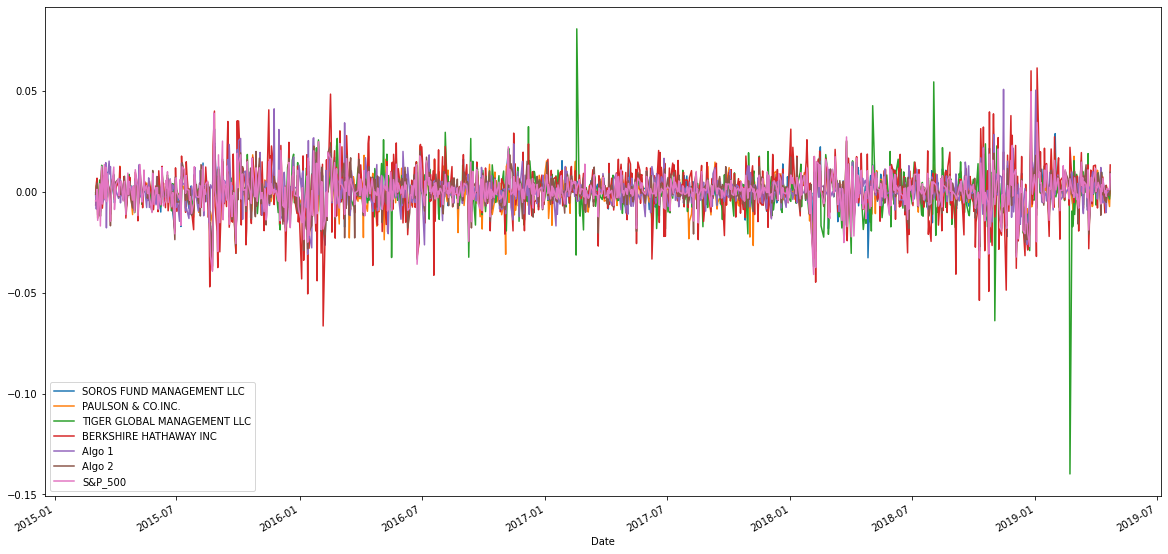

In [15]:
# Plot daily returns
# YOUR CODE HERE
combined_files.plot(figsize=(20,10))

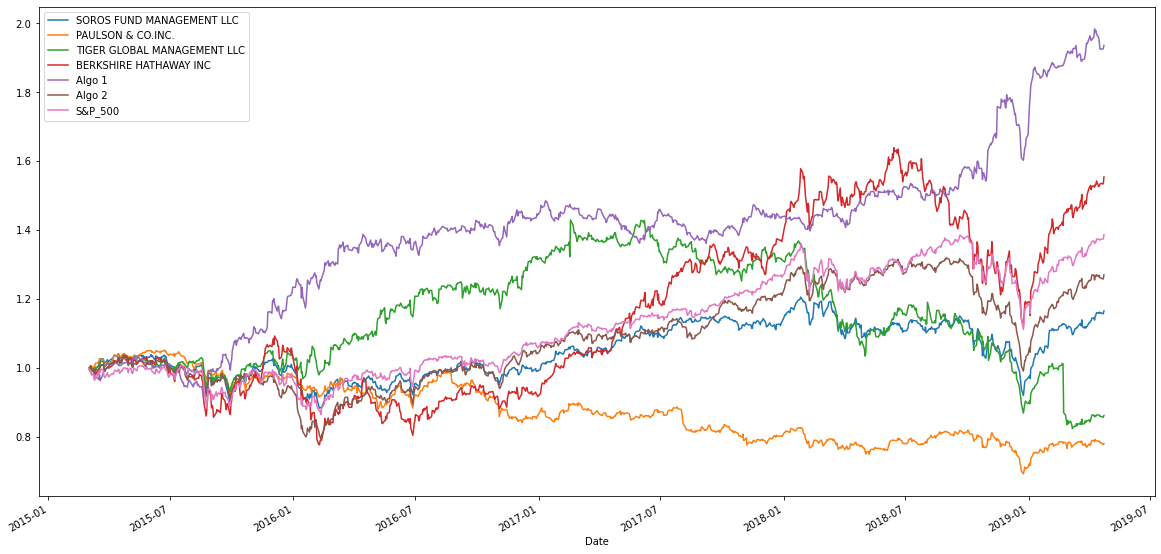

In [16]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1+combined_files).cumprod()
cumulative_returns.plot(figsize=(20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

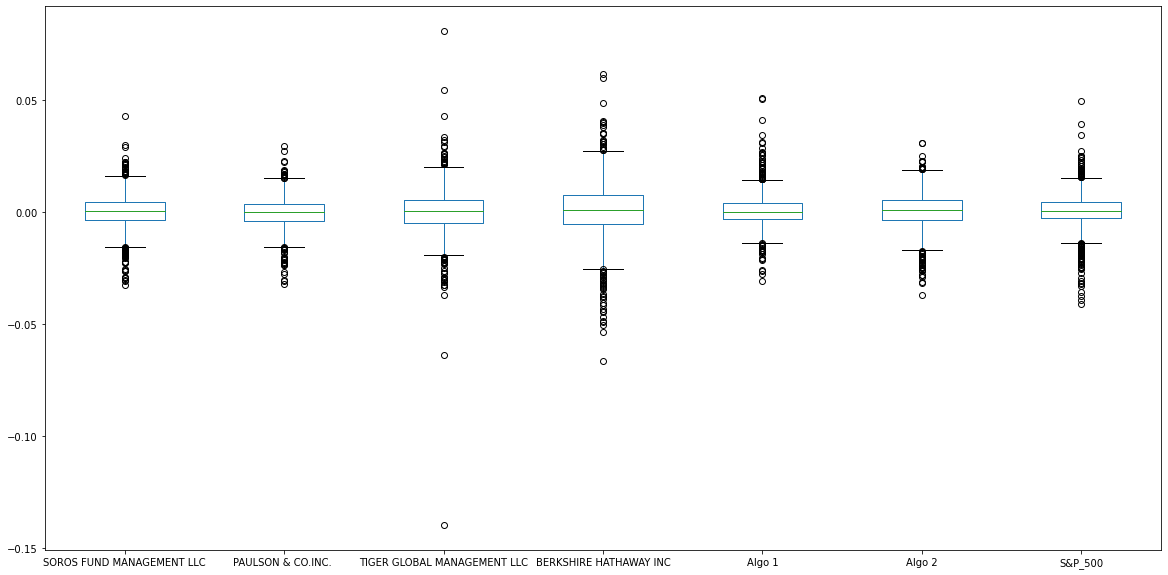

In [17]:
# Box plot to visually show risk
# YOUR CODE HERE
daily_std = combined_files.std()
daily_std.head(10)
port_soros_fund = np.random.normal(scale=0.008, size=10000)
port_paulson = np.random.normal(scale=0.007, size=10000)
port_tiger = np.random.normal(scale=0.01, size=10000)
port_berkshire = np.random.normal(scale=0.013, size=10000)
port_algo1 = np.random.normal(scale=0.0076, size=10000)
port_algo2 = np.random.normal(scale=0.0083, size=10000)
port_sp500 = np.random.normal(scale=0.009, size=10000)

portfolio_std = pd.DataFrame({
    "SOROS FUND MANAGEMENT LLC": port_soros_fund,
    "PAULSON & CO.INC.": port_paulson,
    "TIGER GLOBAL MANAGEMENT LLC": port_tiger,
    "BERKSHIRE HATHAWAY INC": port_berkshire,
    "Algo 1": port_algo1,
    "Algo 2": port_algo2,
    "S&P 500": port_sp500
})
combined_files.plot.box(figsize=(20,10))

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = combined_files.std()
daily_std.head(10)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P_500                        0.008554
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE


my_sp_value = daily_std['S&P_500']
#print (my_sp_value)

#new_index = daily_std.reset_index()
#new_index.head()

for num in daily_std:
    
    
    #print(my_asset_name)
    #print (my_sp_value)
    if num < my_sp_value:
        riskier = "false"
    else:
        riskier = "true"
    print(f' {riskier}')




 false
 false
 true
 true
 false
 false
 true


In [20]:
daily_std > daily_std['S&P_500']

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P_500                        False
dtype: bool

In [21]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std*np.sqrt(252)
annualized_std.head(10)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P_500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

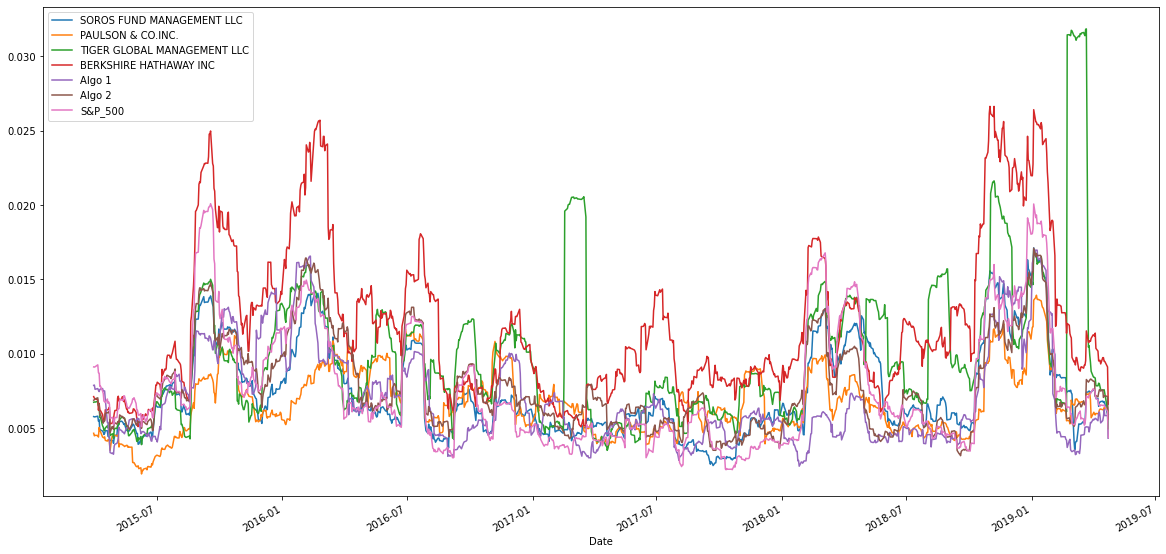

In [22]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
rolled_file =combined_files.rolling(window=21).std()
ax = rolled_file.plot(figsize=(20,10))


In [23]:
# Construct a correlation table
# YOUR CODE HERE
correlation_returns = combined_files.corr()
correlation_returns.style.background_gradient(cmap='coolwarm').set_precision(3)

#fig, ax = plt.subplots(figsize=(20,15))
#sns.heatmap(correlation_returns,cmap="coolwarm", annot= True, cbar=False, fmt=".3f")
#res.set_xticklabels(res.get_xmajorticklabels(), rotation=0)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500
SOROS FUND MANAGEMENT LLC,1.000,0.700,0.561,0.754,0.321,0.827,0.838
PAULSON & CO.INC.,0.700,1.000,0.434,0.546,0.269,0.678,0.670
TIGER GLOBAL MANAGEMENT LLC,0.561,0.434,1.000,0.424,0.164,0.507,0.624
BERKSHIRE HATHAWAY INC,0.754,0.546,0.424,1.000,0.292,0.688,0.751
Algo 1,0.321,0.269,0.164,0.292,1.000,0.288,0.279
Algo 2,0.827,0.678,0.507,0.688,0.288,1.000,0.859
S&P_500,0.838,0.670,0.624,0.751,0.279,0.859,1.000


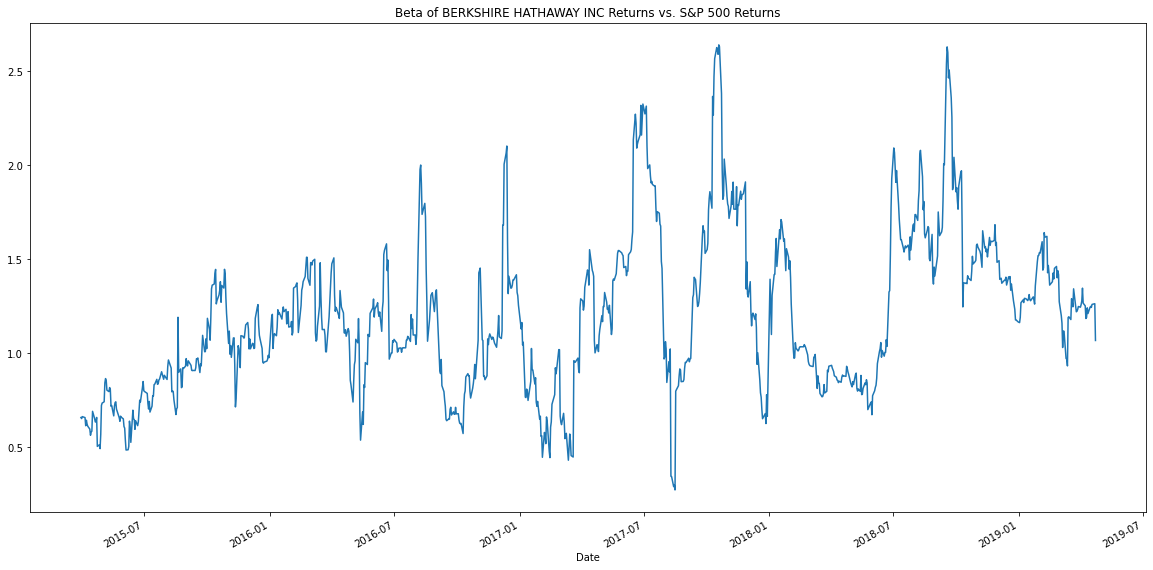

In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
""" Beta = cov(asset)/var(S&P 500)

"""
cov_berkshire = combined_files['BERKSHIRE HATHAWAY INC'].cov(combined_files['S&P_500'])
cov_berkshire
var_sp500 = combined_files['S&P_500'].var()
var_sp500
beta_berkshire = cov_berkshire/var_sp500
beta_berkshire
berk_rolling_cov = combined_files['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_files['S&P_500'])
rolling_var = combined_files['S&P_500'].rolling(window=21).var()
berk_rolling_beta = berk_rolling_cov/rolling_var
berk_rolling_beta.plot(figsize=(20, 10), title='Beta of BERKSHIRE HATHAWAY INC Returns vs. S&P 500 Returns')


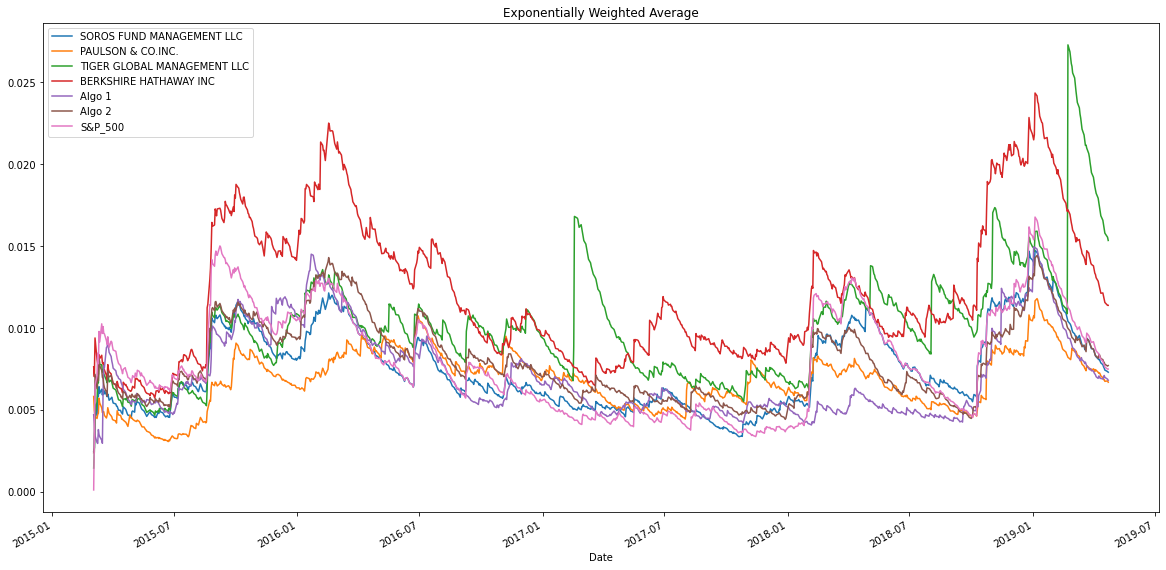

In [25]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
rolled_exp_weigh_mav =combined_files.ewm(halflife=21).std().plot(figsize=(20,10), title="Exponentially Weighted Average")



---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [26]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios= (combined_files.mean()* 252)/(combined_files.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P_500                        0.648267
dtype: float64

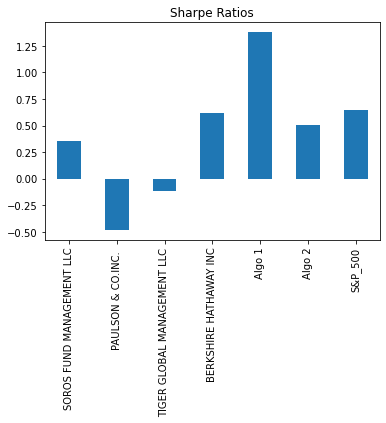

In [27]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

* Algo 1 outperformed the S&P 500 and all the funds that belong to the whales file.
* Algo 2 only outperformed 3 funds from the whale file: (Soros fund, Paulson, and Tiger Global)

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Read the first stock
# YOUR CODE HERE
path_cat_csv = Path("Resources/2_cat_daily.csv")
df_cat_dclose = pd.read_csv(path_cat_csv, infer_datetime_format= True, parse_dates = True, index_col= "Date")
#df_cat_dclose.shape
df_cat_dclose.head()

,Close
Date,
2018-01-02 16:00:00,157.04
2018-01-03 16:00:00,157.28
2018-01-04 16:00:00,159.44
2018-01-05 16:00:00,161.96
2018-01-08 16:00:00,166.03


In [29]:
# Read the second stock
# YOUR CODE HERE
path_gld_csv = Path("Resources/2_gld_daily.csv")
df_gld_dclose = pd.read_csv(path_gld_csv, infer_datetime_format= True, parse_dates = True, index_col= "Date")
#df_cat_dclose.shape
df_gld_dclose.head()

,Close
Date,
2018-01-02 16:00:00,125.15
2018-01-03 16:00:00,124.82
2018-01-04 16:00:00,125.46
2018-01-05 16:00:00,125.33
2018-01-08 16:00:00,125.31


In [30]:
# Read the third stock
"""
The portfolio was built using library os
"""
# YOUR CODE HERE
filenames = os.listdir("Resourcesb")
#filenames
custom_port_df = []
for file in filenames:
    new_df = pd.read_csv(f"Resourcesb/{file}", parse_dates=True, infer_datetime_format= True, index_col="Date")
    custom_port_df.append(new_df)

custom_port_df[2]
combined_df = pd.concat(custom_port_df, axis="columns", join="inner")
combined_df
columns = ["cat","gld","jpm","msft","sbux","wmt"]
combined_df.columns = columns
combined_df
combined_df.reset_index(inplace=True)
combined_df
combined_df['Date'] = pd.to_datetime(combined_df['Date']).dt.date
#combined_df[["date","time"]]= combined_df["Date"].str.split(" ", n=1, expand=True)
#combined_df.drop(columns=["Date","time"], inplace=True)
#combined_df2=pd.to_datetime(['date'], yearfirst=True)
combined_df.set_index("Date", inplace=True)
combined_df
#custom_stocks = pd.concat(custom_port_df, axis="columns", join="inner")

,cat,gld,jpm,msft,sbux,wmt
Date,,,,,,
2018-01-02,157.04,125.15,107.95,85.95,57.63,98.59
2018-01-03,157.28,124.82,108.06,86.35,58.71,99.45
2018-01-04,159.44,125.46,109.04,87.11,58.93,99.54
2018-01-05,161.96,125.33,108.34,88.19,59.61,100.13
2018-01-08,166.03,125.31,108.50,88.28,59.31,101.61
...,...,...,...,...,...,...
2019-12-23,148.50,139.95,137.20,157.41,88.23,119.03
2019-12-24,147.48,141.27,137.58,157.38,88.52,119.51
2019-12-26,148.22,142.38,139.04,158.67,88.08,119.52


In [31]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
""" 
This section was finished using os library
"""

' \nThis section was finished using os library\n'

In [32]:
# Reset the index
# YOUR CODE HERE

In [33]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

In [34]:
# Drop Nulls
# YOUR CODE HERE
combined_df.isnull().sum()

# since no null ==> no need to drop nulss


cat     0
gld     0
jpm     0
msft    0
sbux    0
wmt     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Calculate weighted portfolio returns
weights = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
# YOUR CODE HERE
combined_df_returns = combined_df.pct_change()
#combined_df_returns.head()
combined_df_returns.dropna(inplace=True)
#combined_df_returns.head()
combined_port_returns=combined_df_returns.dot(weights)
#combined_port_returns

combined_port_returns.head()
#combined_files.head()

Date
2018-01-03    0.005338
2018-01-04    0.006897
2018-01-05    0.006369
2018-01-08    0.006203
2018-01-09   -0.002005
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
final_portf_returns = pd.concat([combined_files,combined_port_returns], axis = 'columns', join='inner')
final_portf_returns.rename(columns={0:"Custom"}, inplace=True)
final_portf_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500,Custom
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399,0.005338
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029,0.006897
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034,0.006369
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662,0.006203
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303,-0.002005
2018-01-10,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.001112,0.001525
2018-01-11,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.007034,0.006365
2018-01-12,0.002590,0.002418,0.003807,0.002594,-0.000875,0.002411,0.006750,0.011258
2018-01-16,-0.005126,-0.005553,0.009646,-0.011962,0.003931,-0.009533,-0.003524,-0.003466


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
final_portf_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P_500                        0
Custom                         0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [38]:
# Risk
# YOUR CODE HERE
daily_std_final_portf = final_portf_returns.std()
daily_std_final_portf.head(8)

SOROS FUND MANAGEMENT LLC      0.009486
PAULSON & CO.INC.              0.007383
TIGER GLOBAL MANAGEMENT LLC    0.014023
BERKSHIRE HATHAWAY INC         0.014726
Algo 1                         0.007670
Algo 2                         0.008836
S&P_500                        0.010175
Custom                         0.009711
dtype: float64

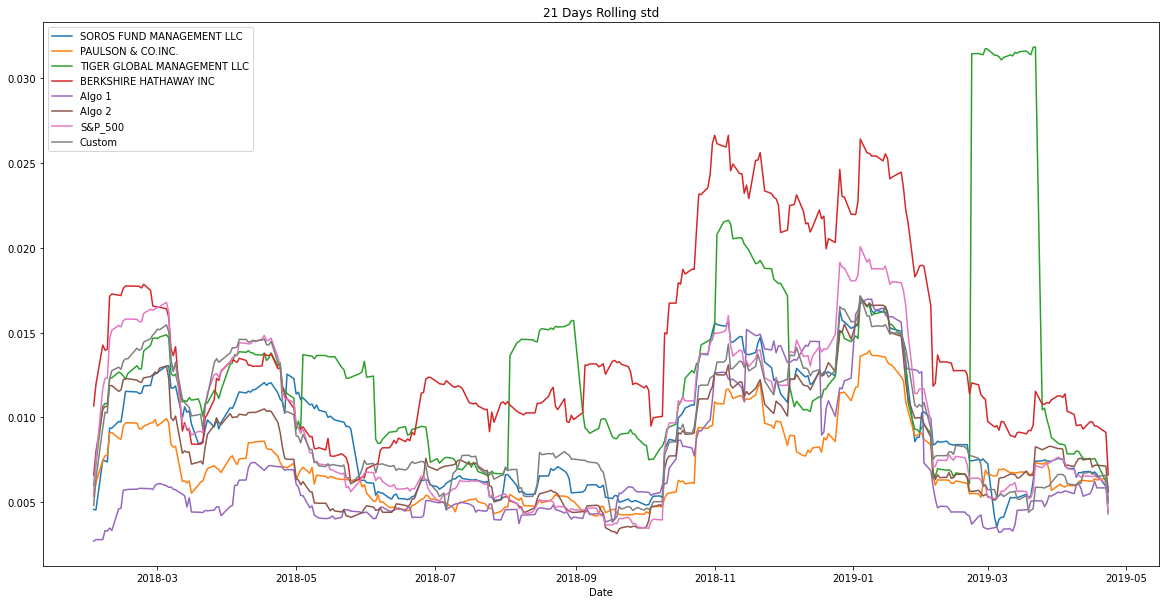

In [39]:
# Rolling
# YOUR CODE HERE
rolled_daily_std_final_port =final_portf_returns.rolling(window=21).std()
ax = rolled_daily_std_final_port.plot(figsize=(20,10),title="21 Days Rolling std")

In [40]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios= (final_portf_returns.mean()* 252)/(final_portf_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.143496
PAULSON & CO.INC.             -0.209302
TIGER GLOBAL MANAGEMENT LLC   -1.327618
BERKSHIRE HATHAWAY INC         0.439395
Algo 1                         1.932709
Algo 2                         0.240768
S&P_500                        0.484234
Custom                         0.686734
dtype: float64

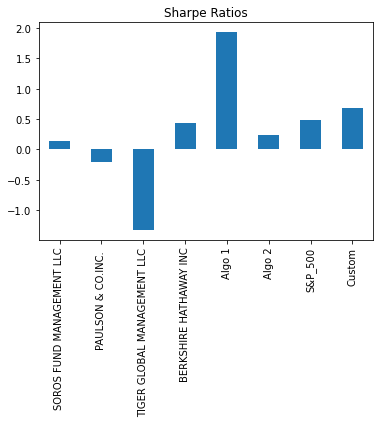

In [41]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

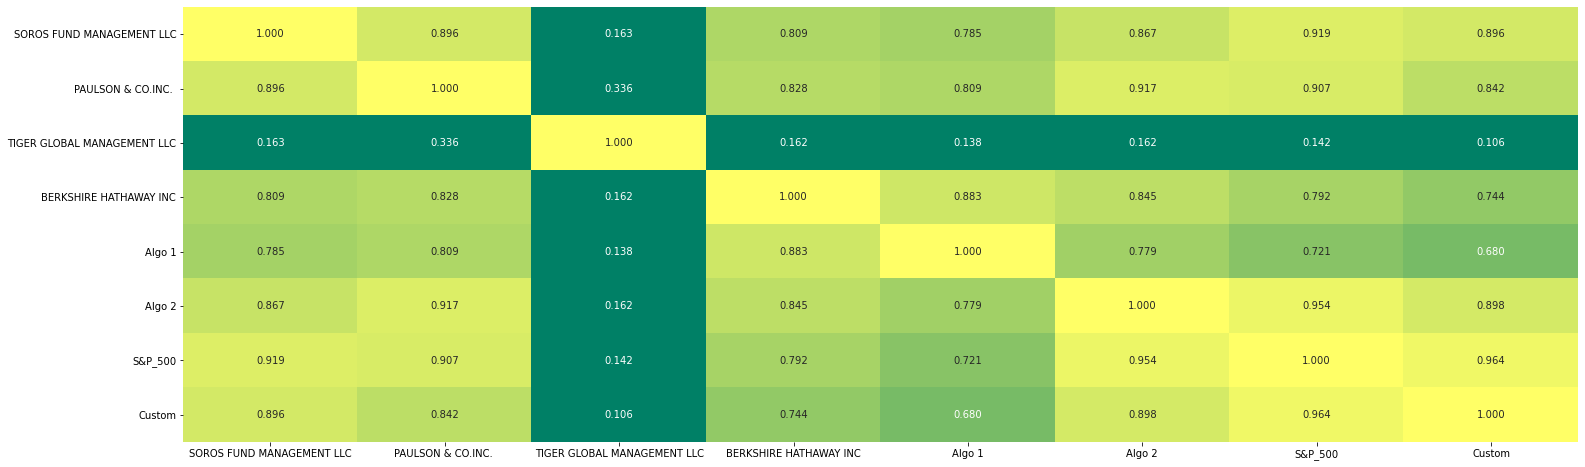

In [42]:
# Create a correlation analysis
# YOUR CODE HERE
correlation_returns = rolled_daily_std_final_port.corr()
fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(correlation_returns,cmap="summer", vmin= 0.4, vmax= 1,annot= True, cbar=False, fmt=".3f")

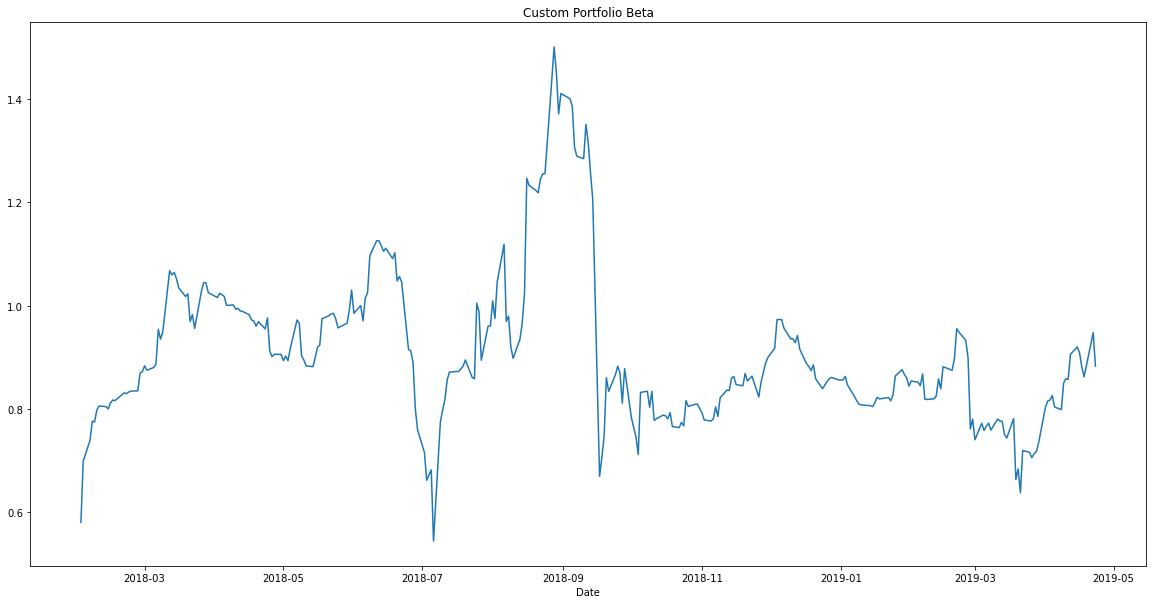

In [43]:
# Beta
# YOUR CODE HERE

""" Beta = cov(asset)/var(S&P 500)

"""
cov_custom = final_portf_returns['Custom'].cov(final_portf_returns['S&P_500'])
cov_custom
var_sp500 = final_portf_returns['S&P_500'].var()
var_sp500
beta_custom = cov_custom/var_sp500
beta_custom
custom_rolling_cov = final_portf_returns['Custom'].rolling(window=21).cov(final_portf_returns['S&P_500'])
rolling_var = final_portf_returns['S&P_500'].rolling(window=21).var()
custom_rolling_beta = custom_rolling_cov/rolling_var
custom_rolling_beta.plot(figsize=(20, 10), title='Custom Portfolio Beta')